In [46]:
import os
import numpy as np
import pandas as pd
import higashi
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.interpolate import make_interp_spline
import matplotlib.gridspec as gridspec
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib as mpl
import seaborn as sns
import pandas as pd
from matplotlib.patches import ConnectionPatch
from matplotlib import colors
from scipy.stats import pearsonr, zscore
mpl.style.use('seaborn-white')
import scipy
def compare(v, l, n):
    for i in range(n):
        if ((v + i) in l) or ((v - i) in l):return True
    return False

def F1_score(d1, d2):
    m = 0
    a = 5
    for item in d2:
        if compare(item, d1, a):
            m += 1

    print(m)
    F1 = 2 * (((m/len(d1)) * (m/len(d2))) / ((m/len(d1)) + (m/len(d2))))
    return F1
def fig_chr_heatmap(all_matrix, out_matrix, raw_out_matrix):
    plt.figure(figsize=(30, 11))
    widths = [10, 10, 10]
    heights = [10, 1]
    gs = gridspec.GridSpec(nrows=2, ncols=3, width_ratios=widths,height_ratios=heights)
    #data = np.tril(out_matrix, k=0) + np.triu(raw_out_matrix, k=0)
    ax1 = plt.subplot(gs[0, 0])
    ax1.matshow(all_matrix, cmap='YlOrRd', vmin=-0.5, vmax=2)
    ax1.set_title('all', fontdict={'fontsize': 20, 'fontweight': 'medium'})
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax2 = plt.subplot(gs[0, 1])
    ax2.matshow(out_matrix, cmap='YlOrRd', vmin=-1, vmax=20)
    ax2.set_title('out', fontdict={'fontsize': 20, 'fontweight': 'medium'})
    ax2.set_xticklabels([])
    ax2.set_yticklabels([])
    ax3 = plt.subplot(gs[0, 2])
    ax3.matshow(raw_out_matrix, cmap='YlOrRd', vmin=-1, vmax=20)
    ax3.set_title('raw', fontdict={'fontsize': 20, 'fontweight': 'medium'})
    ax3.set_xticklabels([])
    ax3.set_yticklabels([])
    plt.show()

In [47]:
def pearson_score(m1, m2):
    return pearsonr(m1.reshape((-1)), m2.reshape((-1)))[0]
def zscore_norm(matrix):
    v = matrix.reshape((-1))
    if not (v == v[0]).all():
        matrix = zscore(v).reshape((len(matrix), -1))
    return matrix

def Result_record(file_dir, chr_key, file):
    chr_dir = file_dir + '/' + file + '/' + chr_key + '/' + file + '_' + chr_key + '.npz'
    if os.path.isfile(chr_dir):
        return True
    return False

def get_rawandout(file, file_dir, chr_key, re, type):
    #100kb
    o_dir = file_dir + '/' + file + '/' + chr_key + '/' + file + '_' + chr_key + type
    r_dir = file_dir + '/' + file + '/' + chr_key + '/' + 'raw_' + chr_key + type
    #print(o_dir)
    if type == '.matrix.gz':
        raw = np.loadtxt(r_dir)
        node = np.loadtxt(o_dir)
        return raw, node
    elif type == '.npz':
        raw = scipy.sparse.load_npz(r_dir)
        node = scipy.sparse.load_npz(o_dir)
        return raw, node
    return #print('error : get none mat')
def get_mat(chr, num, re, type, ifnew = False):
    '''
    :param chr:
    :param num:
    :param re:
    :param type:.npz'
    :param output_dir:
    :return:
    '''
    file_dir = 'D:/dataset'
    files = randomfile(file_dir, num)

    #print(files)
    HiC_dir = file_dir + '/lym/HiC_node2vec'
    chr_key = chr
    if Result_record(HiC_dir, chr_key, files[0]):
        raw, node = get_rawandout(files[0], HiC_dir, chr_key, re, type)
    for file in tqdm(files[1:]):
        if Result_record(HiC_dir, chr_key, file):
            r, n = get_rawandout(file, HiC_dir, chr_key, re, type)
        if node.shape == n.shape:
            raw = raw + r
            node = node + n
    if type == '.npz':
        raw = raw.todense()
        node = node.todense()

    return raw, node

def get_file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            L.append(file)
    return L


def randomfile(file_dir, r):
    scSCRIPE_dir = file_dir + '\\filtered_1000_cells_single_cell_files'
    files = get_file_name(scSCRIPE_dir)
    np.random.shuffle(files)
    return files[:r]

def a():
    file_dir = 'D:\\dataset'
    HiC_node2vec_dir = file_dir + '\\HiC_node2vec'
    raw_out_matrix, out_matrix = get_mat('chr1', 100, 100000, '.npz')
    out_matrix = zscore_norm(out_matrix)
    raw_out_matrix = zscore_norm(raw_out_matrix)
    # fig_chr_heatmap(out_matrix, raw_out_matrix, 50, 'chr1', 10000, 1, start, stop)
    raw_all = np.loadtxt('D:\\py_project\\HiC_node2vec\\raw_all_chr1_100000.matrix')
    raw_all = zscore_norm(raw_all)
    fig_chr_heatmap(raw_all, out_matrix, raw_out_matrix )
    c_o_all, m_o_all = higashi.compartment(raw_all, return_PCA=True)
    out_pc1 = higashi.compartment(out_matrix, False, m_o_all, None)
    raw_out_pc1 = higashi.compartment(raw_out_matrix, False, m_o_all, None)
    s1 = pearson_score(out_pc1, c_o_all)
    s2 = pearson_score(raw_out_pc1, c_o_all)
    print(s1, s2)
    print(out_matrix)
    return s1, s2
o = []
for i in range(1):
    o.append(a())
o

100%|██████████| 99/99 [00:05<00:00, 17.76it/s]


0.31371918252959596 0.3741807049838248
[[ 0.   48.35 44.93 ... 14.69 14.07 14.44]
 [48.35  0.   45.62 ... 15.19 15.96 13.7 ]
 [44.93 45.62  0.   ... 14.45 15.3  14.22]
 ...
 [14.69 15.19 14.45 ...  0.   55.81 55.04]
 [14.07 15.96 15.3  ... 55.81  0.   54.55]
 [14.44 13.7  14.22 ... 55.04 54.55  0.  ]]


[(0.31371918252959596, 0.3741807049838248)]

In [13]:
o

[(0.045492696048271906, 0.025667964466291902),
 (0.013901026479776042, 0.01063144487793287),
 (-0.032337683684083074, -0.01607954725857314)]

In [23]:
for item in o:
    if item[0] < 0.4: o.remove(item)
o

[(0.7205935959710859, -0.10191719655523071),
 (0.4154381473516764, -0.028066956121544032),
 (0.6654134551170533, 0.12363939722153366),
 (0.4161685302030088, -0.2511736288993732)]

In [24]:
for i in range(20):
    s1, s2 = a()
    if s1 > 0.4: o.append((s1, s2))
o[(0.7205935959710859, -0.10191719655523071),
  (0.4154381473516764, -0.028066956121544032),
  (0.6654134551170533, 0.12363939722153366),
  (0.4161685302030088, -0.2511736288993732),
  (0.7607747149070564, 0.8188419073265709),
  (0.821070964014355, 0.5905066092077188),
  (0.8061339009558866, 0.2748755750908229),
  (0.868954588751698, -0.1445145919943517),
  (0.6884342375215157, 0.2410719785156849),
  (0.898113031165202, 0.21780582908240503),
  (0.837015329137758, -0.04134330720530696),
  (0.8139970445439492, 0.6328306847152594)]

100%|██████████| 50/50 [01:10<00:00,  1.40s/it]


[(0.7205935959710859, -0.10191719655523071),
 (0.4154381473516764, -0.028066956121544032),
 (0.6654134551170533, 0.12363939722153366),
 (0.4161685302030088, -0.2511736288993732),
 (0.7607747149070564, 0.8188419073265709),
 (0.821070964014355, 0.5905066092077188),
 (0.8061339009558866, 0.2748755750908229),
 (0.868954588751698, -0.1445145919943517),
 (0.6884342375215157, 0.2410719785156849),
 (0.898113031165202, 0.21780582908240503),
 (0.837015329137758, -0.04134330720530696),
 (0.8139970445439492, 0.6328306847152594)]

In [32]:
data = [(0.7205935959710859, -0.10191719655523071),
 (0.4154381473516764, -0.028066956121544032),
 (0.6654134551170533, 0.12363939722153366),
 (0.4161685302030088, -0.2511736288993732),
 (0.7607747149070564, 0.8188419073265709),
 (0.821070964014355, 0.5905066092077188),
 (0.8061339009558866, 0.2748755750908229),
 (0.868954588751698, -0.1445145919943517),
 (0.6884342375215157, 0.2410719785156849),
 (0.898113031165202, 0.21780582908240503),
 (0.837015329137758, -0.04134330720530696),
 (0.8139970445439492, 0.6328306847152594)]

data = pd.DataFrame(data)
data


0         1
0   0.720594 -0.101917
1   0.415438 -0.028067
2   0.665413  0.123639
3   0.416169 -0.251174
4   0.760775  0.818842
5   0.821071  0.590507
6   0.806134  0.274876
7   0.868955 -0.144515
8   0.688434  0.241072
9   0.898113  0.217806
10  0.837015 -0.041343
11  0.813997  0.632831

D:\anaconda\envs\HNX\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


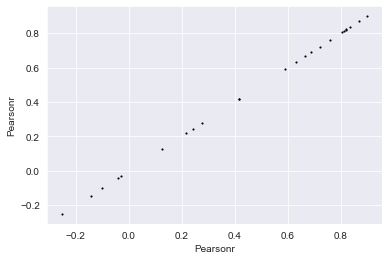

In [35]:
data1 = data[0]
data2 = data[1]
X1 = data1
Y1 = data1
X2 = data2
Y2 = data2

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_xlabel('Pearsonr')
ax1.set_ylabel('Pearsonr')
ax1.scatter(X1, Y1, s=5, c='k', marker='.')
ax1.scatter(X2, Y2, s=5, c='k', marker='.')
fig.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib as mpl
import seaborn as sns
import pandas as pd
from matplotlib.patches import ConnectionPatch
from matplotlib import colors
mpl.style.use('seaborn-white')

def compare(v, l, n):
    for i in range(n):
        if ((v + i) in l) or ((v - i) in l):return True
    return False

def F1_score(d1, d2):
    m = 0
    a = 5
    for item in d2:
        if compare(item, d1, a):
            m += 1

    print(m)
    F1 = 2 * (((m/len(d1)) * (m/len(d2))) / ((m/len(d1)) + (m/len(d2))))
    return F1
def fig_chr_heatmap(raw_out_matrix):
    plt.figure(figsize=(30, 11))
    widths = [10, 10, 10]
    heights = [10, 1]
    gs = gridspec.GridSpec(nrows=2, ncols=3, width_ratios=widths,height_ratios=heights)
    #data = np.tril(out_matrix, k=0) + np.triu(raw_out_matrix, k=0)
    ax1 = plt.subplot(gs[0, 0])
    ax1.matshow(raw_out_matrix, cmap='YlOrRd', vmin=-1, vmax=1)
    ax1.set_title('all', fontdict={'fontsize': 20, 'fontweight': 'medium'})
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    plt.show()

In [48]:
i = '0.02'
i = float(i)

In [49]:
i

0.02